# Used cars price prediction in Egypt Using machine learning

## Prepared by
## Osama Saeid

###

### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import r2_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
import joblib

%matplotlib inline
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(12,10)})

### 2. Importing Dataset and exploration

In [2]:
df =pd.read_csv('Cars.csv')

# Drop Indexing
df.drop('Unnamed: 0' , axis=1,inplace=True)

print(df.shape)
df.sample(10)
#shape of data after editing

(14741, 11)


,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
14165,Fiat,Shahin,Sedan,Burgundy,2010,Benzine,10000 to 19999,1400 - 1500 CC,Manual,51.8,Cairo
7348,Chevrolet,Optra,Sedan,Silver,2006,Benzine,20000 to 29999,1600 CC,Automatic,110.0,Minya
8406,Chevrolet,Cruze,Sedan,Red,2019,Benzine,90000 to 99999,1600 CC,Automatic,195.5,Giza
6426,Chevrolet,Lanos,Sedan,Other Color,2012,Benzine,120000 to 139999,1400 - 1500 CC,Manual,116.0,Alexandria
57,Hyundai,Accent,Sedan,Black,2010,Benzine,More than 200000,1400 - 1500 CC,Manual,125.0,Giza
14273,Fiat,Shahin,Sedan,Red,1999,Benzine,120000 to 139999,1400 - 1500 CC,Manual,34.5,Cairo
5881,Chevrolet,Aveo,Sedan,Silver,2010,Benzine,10000 to 19999,1400 - 1500 CC,Manual,100.0,Dakahlia
11039,Fiat,131,Sedan,Red,1980,Benzine,0 to 9999,1600 CC,Manual,27.0,Cairo
1803,Hyundai,Matrix,Hatchback,Red,2005,Benzine,90000 to 99999,1600 CC,Automatic,155.0,Gharbia
12805,Fiat,128,Sedan,Gray,1987,Benzine,180000 to 199999,1000 - 1300 CC,Manual,21.3,Beni Suef


In [3]:
df.info()
# Good , We have cleen data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14741 non-null  object 
 1   Model         14741 non-null  object 
 2   Body          14741 non-null  object 
 3   Color         14741 non-null  object 
 4   Year          14741 non-null  int64  
 5   Fuel          14741 non-null  object 
 6   Kilometers    14741 non-null  object 
 7   Engine        14741 non-null  object 
 8   Transmission  14741 non-null  object 
 9   Price         14741 non-null  float64
 10  Gov           14741 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [4]:
df.describe()
#describes the relations between data sections

,Year,Price
count,14741.000000,14741.000000
mean,2005.456821,116.584987
std,12.655566,82.192718
min,1970.000000,3.000000
25%,1998.000000,43.700000
50%,2010.000000,110.000000
75%,2015.000000,161.000000
max,2022.000000,471.500000


In [5]:
pd.DataFrame({'': df.columns , 'Number of unique values':  df.nunique().values})
# Number of uniques values in Data

,,Number of unique values
0,Brand,3
1,Model,18
2,Body,3
3,Color,14
4,Year,53
5,Fuel,2
6,Kilometers,16
7,Engine,3
8,Transmission,2
9,Price,631


In [6]:
df.Brand.value_counts()
#brand counts

Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64

In [8]:
df.Model.value_counts()

128        2425
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: Model, dtype: int64

### 3. Exploratory data analysis

Manual       9862
Automatic    4879
Name: Transmission, dtype: int64


<AxesSubplot: xlabel='Transmission', ylabel='Price'>

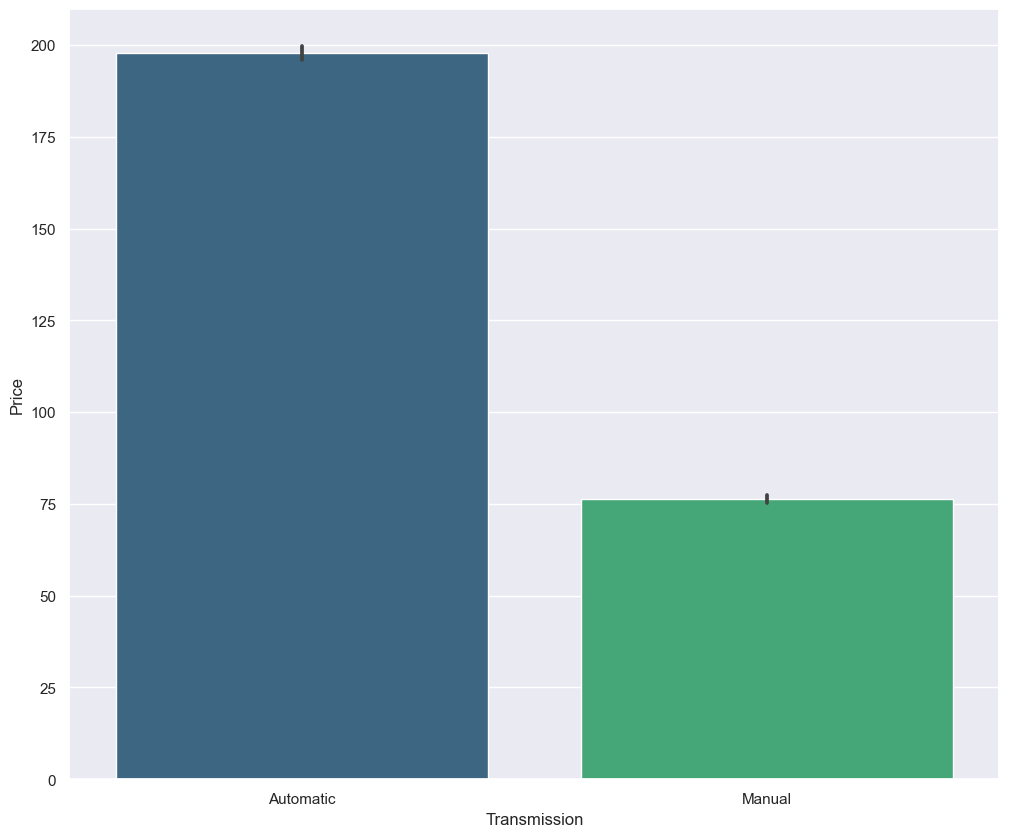

In [9]:
print(df.Transmission.value_counts())
sns.barplot(x = df["Transmission"], y = df["Price"] , palette='viridis')

Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: Brand, dtype: int64


<AxesSubplot: xlabel='Brand', ylabel='Price'>

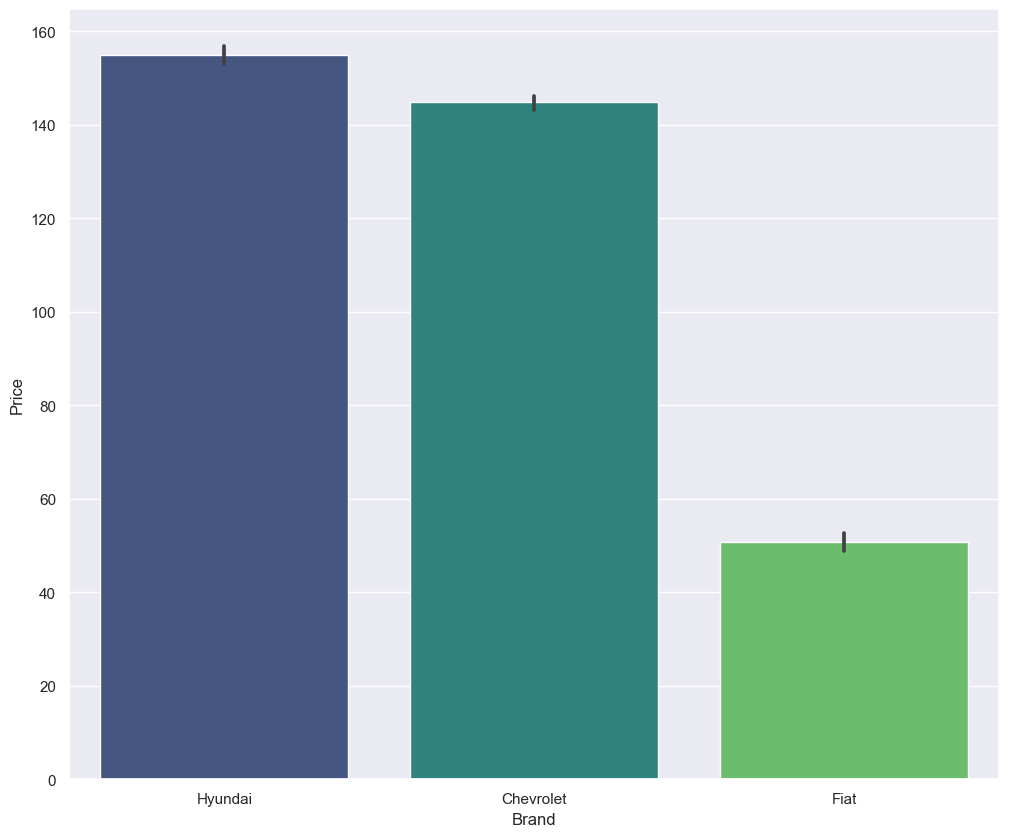

In [10]:
print(df.Brand.value_counts())
sns.barplot(x = df["Brand"], y = df["Price"] , palette='viridis')

1600 CC           6762
1400 - 1500 CC    4356
1000 - 1300 CC    3623
Name: Engine, dtype: int64


<AxesSubplot: xlabel='Engine', ylabel='Price'>

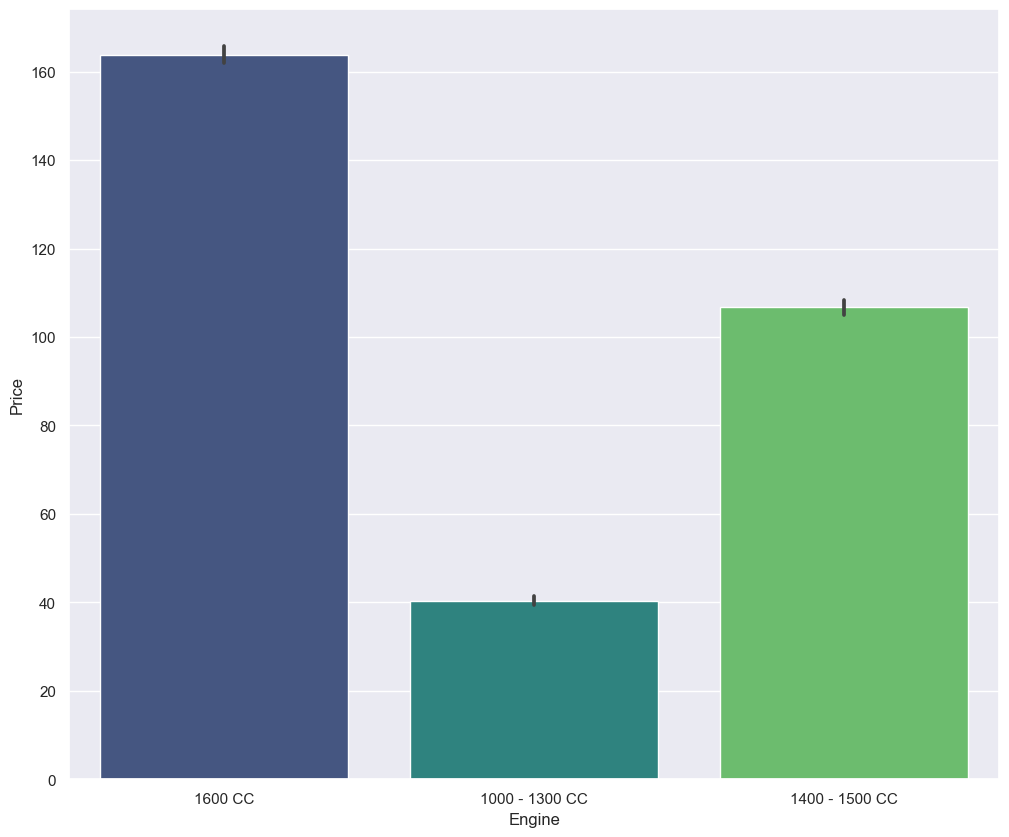

In [11]:
print(df.Engine.value_counts())
sns.barplot(x = df["Engine"], y = df["Price"] , palette='viridis')

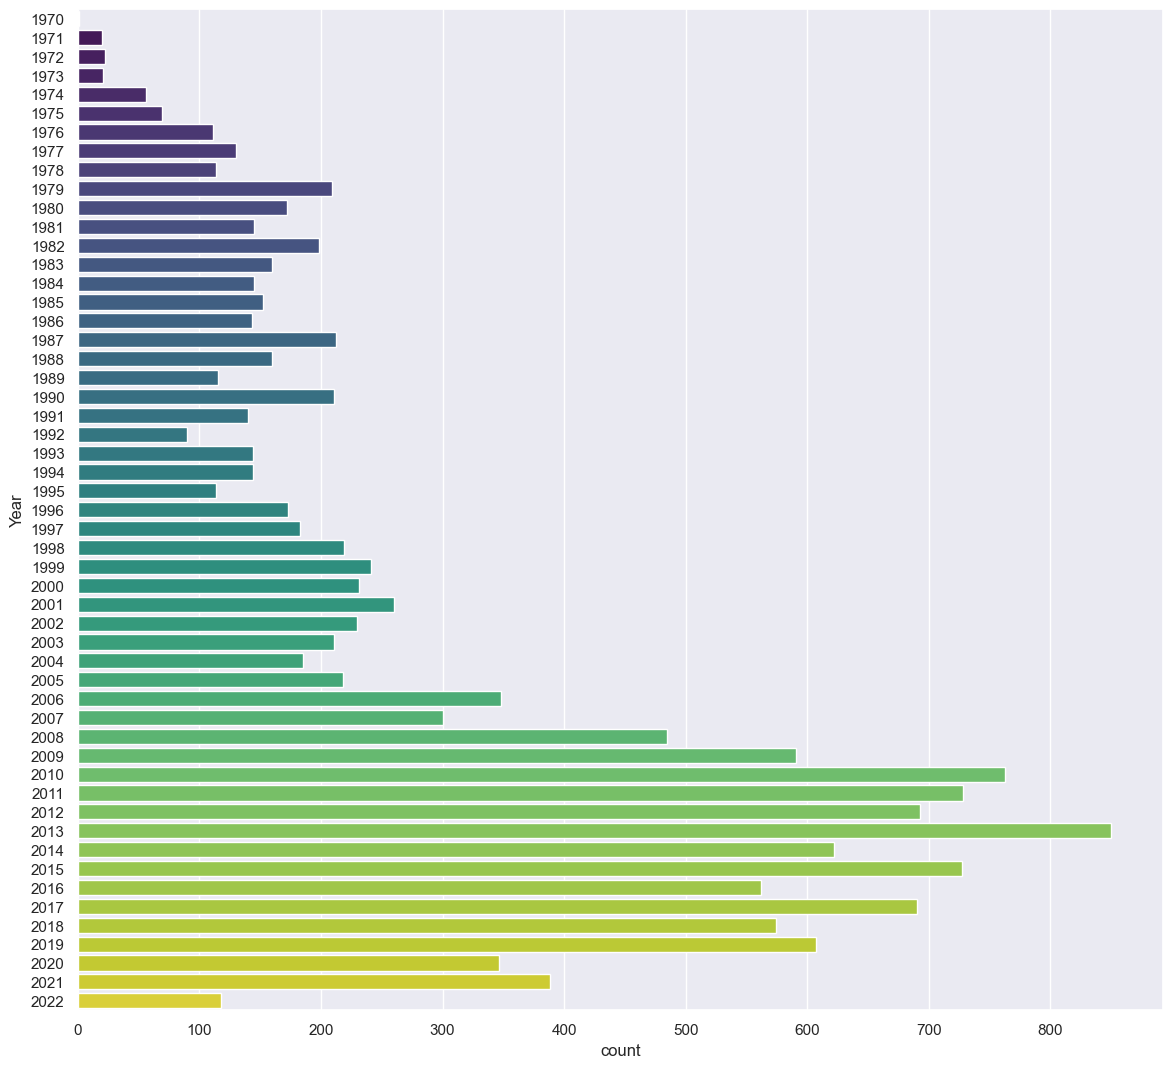

In [12]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Year"] , palette='viridis');

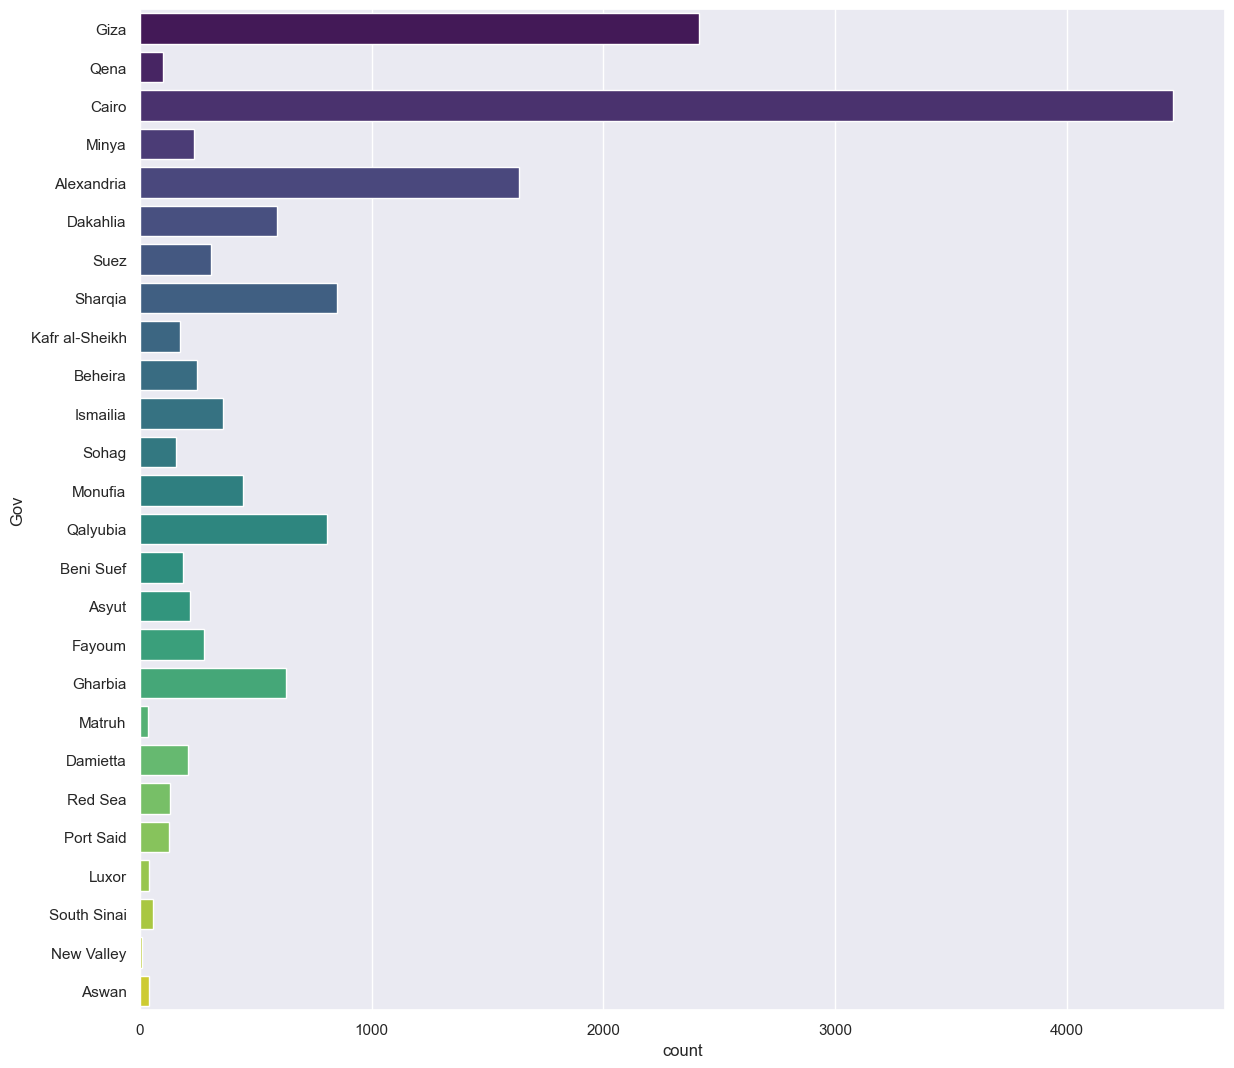

In [13]:
plt.figure(figsize=(14,13))
ax = sns.countplot(y = df["Gov"] , palette='viridis');

### 4. Pre-processing & Feature Engineering

In [14]:
# Take copy from Dataset
df_copy = df.copy()

In [15]:
def kilometer_frmt(kilometers):
    meters = {
        '100000 to 119999' : 10 ,
        '90000 to 99999' : 9, 
        '120000 to 139999' : 11,
        'More than 200000' : 15,
        '10000 to 19999' : 1, 
        '180000 to 199999' : 14,
        '140000 to 159999' : 12, 
        '160000 to 179999' : 13, 
        '20000 to 29999' : 2,
        '30000 to 39999' : 3, 
        '80000 to 89999' : 8, 
        '70000 to 79999' : 7, 
        '0 to 9999' : 0 ,
        '60000 to 69999' : 6, 
        '40000 to 49999' : 4, 
        '50000 to 59999' : 5
    }
    return meters[kilometers]


def color_frmt(color):
    colors = {
        'White' : 0,
        'Black' : 1, 
        'Silver' : 2,
        'Gray' : 3,
        'Red' : 4, 
        'Blue- Navy Blue' : 5, 
        'Other Color' : 6, 
        'Burgundy' : 7,
        'Green' : 8, 
        'Gold' : 9, 
        'Beige' : 10,
        'Brown' : 11,
        'Yellow' : 12,
        'Orange' :13
    }
    return colors[color]
    

def engine_size(engine):
    if engine == 'More than 3000 CC':
        return 3.0
    elif engine == '1600 CC':
        return 1.6
    elif engine == '1400 - 1500 CC' :
        return 1.5
    elif engine == '1000 - 1300 CC':
        return 1.2
    elif engine  == '1800 - 2000 CC':
        return 2.0
    else:
        return 2.5



def fuel_type(fuel):
    if fuel == 'Benzine' :
        return 1
    else:
        return 0

In [16]:
df_copy.sample(10)

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
12877,Fiat,128,Sedan,Gray,1980,Benzine,50000 to 59999,1000 - 1300 CC,Manual,23.0,Alexandria
14628,Fiat,Uno,Hatchback,Gray,1996,Benzine,140000 to 159999,1000 - 1300 CC,Manual,69.0,Alexandria
10574,Fiat,128,Sedan,Red,1979,Benzine,90000 to 99999,1000 - 1300 CC,Manual,15.0,Giza
2812,Hyundai,Verna,Sedan,Gray,2008,Benzine,0 to 9999,1600 CC,Manual,80.0,Suez
2256,Hyundai,Verna,Sedan,White,2011,Benzine,180000 to 199999,1600 CC,Manual,90.0,Cairo
3558,Hyundai,Avante,Sedan,Silver,2011,Benzine,140000 to 159999,1600 CC,Automatic,241.5,Cairo
1738,Hyundai,Matrix,Hatchback,Green,2003,Benzine,0 to 9999,1600 CC,Automatic,155.0,Cairo
11956,Fiat,Tipo,Sedan,Gray,2018,Benzine,100000 to 119999,1600 CC,Automatic,300.0,Gharbia
4157,Hyundai,Elantra,Sedan,Gray,2017,Benzine,60000 to 69999,1600 CC,Automatic,310.5,Alexandria
5717,Chevrolet,Aveo,Sedan,Other Color,2007,Benzine,20000 to 29999,1400 - 1500 CC,Manual,95.0,Beheira


In [17]:
def owner(year):
    if year > 2017 :
        return 1
    else:
        return 0

In [18]:
# Formating Some categorical features
df_copy.Kilometers = df_copy.Kilometers.apply(kilometer_frmt)
df_copy.Engine = df_copy.Engine.apply(engine_size)
df_copy.Fuel = df_copy.Fuel.apply(fuel_type)
df_copy.Brand = df_copy.Brand.map({'Hyundai' : 0 , 'Fiat' :1 , 'Chevrolet' :2})
df_copy.Body = df_copy.Body.map({'Sedan' : 0 , 'Hatchback' :1 , 'SUV' :2 , 'Coupe' :3 , 'Cabriolet':4})
df_copy.Transmission = df_copy.Transmission.map({'Automatic' : 1 , 'Manual':0})
df_copy.Color = df_copy.Color.apply(color_frmt)

# Some Features Engineerning
df_copy['Owner'] = df_copy.Year.apply(owner)
df_copy["Car Age"] = 2022 - df_copy["Year"]
df_copy = df_copy.drop(columns = ["Year"])
df['Price'] = df['Price'].apply(lambda e : round(e ,2))

In [19]:
df_copy.sample(10)

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Owner,Car Age
8615,2,Lanos,0,6,1,7,1.5,0,143.8,Alexandria,0,9
1850,0,Tucson,2,1,1,0,1.6,1,161.4,Giza,1,4
14528,1,Tipo,1,4,1,15,1.6,0,345.0,Cairo,1,1
949,0,Elantra,0,3,1,0,1.6,1,161.4,Alexandria,1,0
2473,0,Verna,0,0,0,1,1.6,0,88.0,Suez,0,13
5799,2,Aveo,0,2,1,13,1.5,0,105.0,Giza,0,10
1902,0,Verna,0,3,1,11,1.6,0,130.0,Cairo,0,10
7455,2,Optra,0,4,1,15,1.6,1,135.0,Qalyubia,0,15
2103,0,Verna,0,0,1,1,1.6,0,175.0,Port Said,0,6
908,0,Elantra,0,2,1,3,1.6,1,295.0,Cairo,1,2


In [20]:
df_copy.dtypes
#data types

Brand             int64
Model            object
Body              int64
Color             int64
Fuel              int64
Kilometers        int64
Engine          float64
Transmission      int64
Price           float64
Gov              object
Owner             int64
Car Age           int64
dtype: object

In [21]:
# Converting categorical features

nums = [] 
lbl= LabelEncoder()

for col in df_copy.loc[ : , df_copy.dtypes == np.object].columns:
    df_copy[col] = lbl.fit_transform(df_copy[col])
    # To know the meaning of numbers
    directory = {label: index for index , label  in enumerate(lbl.classes_)}
    nums.append(directory)
nums

[{'128': 0,
  '131': 1,
  'Accent': 2,
  'Avante': 3,
  'Aveo': 4,
  'Cruze': 5,
  'Elantra': 6,
  'Excel': 7,
  'I10': 8,
  'Lanos': 9,
  'Matrix': 10,
  'Optra': 11,
  'Punto': 12,
  'Shahin': 13,
  'Tipo': 14,
  'Tucson': 15,
  'Uno': 16,
  'Verna': 17},
 {'Alexandria': 0,
  'Aswan': 1,
  'Asyut': 2,
  'Beheira': 3,
  'Beni Suef': 4,
  'Cairo': 5,
  'Dakahlia': 6,
  'Damietta': 7,
  'Fayoum': 8,
  'Gharbia': 9,
  'Giza': 10,
  'Ismailia': 11,
  'Kafr al-Sheikh': 12,
  'Luxor': 13,
  'Matruh': 14,
  'Minya': 15,
  'Monufia': 16,
  'New Valley': 17,
  'Port Said': 18,
  'Qalyubia': 19,
  'Qena': 20,
  'Red Sea': 21,
  'Sharqia': 22,
  'Sohag': 23,
  'South Sinai': 24,
  'Suez': 25}]

In [22]:
df_copy

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Owner,Car Age
0,0,2,0,1,1,12,1.6,1,140.0,10,0,15
1,0,2,0,2,1,14,1.2,0,78.0,20,0,17
2,0,2,0,3,1,12,1.5,0,70.0,10,0,23
3,0,2,0,5,1,12,1.6,1,150.0,5,0,13
4,0,2,0,2,1,1,1.2,0,75.0,10,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,1,16,1,7,1,13,1.2,0,46.0,5,0,25
14737,1,16,1,2,1,2,1.2,0,46.0,0,0,26
14738,1,16,1,7,1,1,1.2,0,43.7,10,0,29
14739,1,16,1,2,1,1,1.2,0,69.0,5,0,26


<AxesSubplot: >

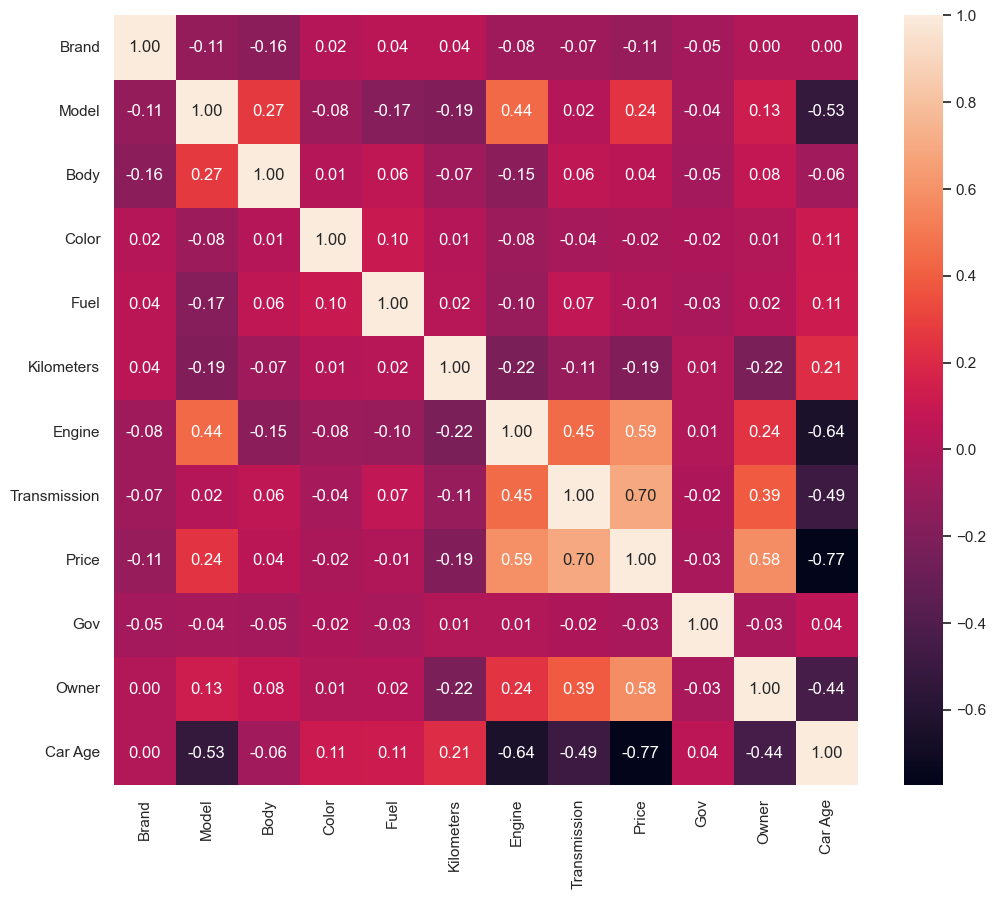

In [23]:
sns.heatmap(df_copy.corr(), annot=True, fmt='.2f')

### 5. Modeling

In [24]:
x = df_copy.drop(columns = ['Price'])
y = df_copy[['Price']]

In [25]:
x

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Owner,Car Age
0,0,2,0,1,1,12,1.6,1,10,0,15
1,0,2,0,2,1,14,1.2,0,20,0,17
2,0,2,0,3,1,12,1.5,0,10,0,23
3,0,2,0,5,1,12,1.6,1,5,0,13
4,0,2,0,2,1,1,1.2,0,10,0,22
...,...,...,...,...,...,...,...,...,...,...,...
14736,1,16,1,7,1,13,1.2,0,5,0,25
14737,1,16,1,2,1,2,1.2,0,0,0,26
14738,1,16,1,7,1,1,1.2,0,10,0,29
14739,1,16,1,2,1,1,1.2,0,5,0,26


In [26]:
y

,Price
0,140.0
1,78.0
2,70.0
3,150.0
4,75.0
...,...
14736,46.0
14737,46.0
14738,43.7
14739,69.0


In [27]:
std = StandardScaler()
x = pd.DataFrame(std.fit_transform(x) , columns=x.columns)
x

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov,Owner,Car Age
0,-1.103026,-0.963439,-0.294743,-0.846956,0.195189,0.627322,0.794016,1.421730,0.146539,-0.399972,-0.121941
1,-1.103026,-0.963439,-0.294743,-0.503150,0.195189,1.006810,-1.689981,-0.703368,1.637516,-0.399972,0.036098
2,-1.103026,-0.963439,-0.294743,-0.159344,0.195189,0.627322,0.173017,-0.703368,0.146539,-0.399972,0.510213
3,-1.103026,-0.963439,-0.294743,0.528269,0.195189,0.627322,0.794016,1.421730,-0.598950,-0.399972,-0.279980
4,-1.103026,-0.963439,-0.294743,-0.503150,0.195189,-1.459860,-1.689981,-0.703368,0.146539,-0.399972,0.431194
...,...,...,...,...,...,...,...,...,...,...,...
14736,0.141498,1.436107,2.660909,1.215881,0.195189,0.817066,-1.689981,-0.703368,-0.598950,-0.399972,0.668252
14737,0.141498,1.436107,2.660909,-0.503150,0.195189,-1.270116,-1.689981,-0.703368,-1.344439,-0.399972,0.747271
14738,0.141498,1.436107,2.660909,1.215881,0.195189,-1.459860,-1.689981,-0.703368,0.146539,-0.399972,0.984329
14739,0.141498,1.436107,2.660909,-0.503150,0.195189,-1.459860,-1.689981,-0.703368,-0.598950,-0.399972,0.747271


In [28]:
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(11792, 11)
(2949, 11)
(11792, 1)
(2949, 1)


In [29]:
models = {
    "KNeighborsRegressor" : KNeighborsRegressor(), 
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor()
}  

In [30]:
for name, model in models.items():
    print(f'Model: {name}')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(f'R2 Score: {round(r2_score(y_test, y_pred)*100 , 1)} %')  
    print('_'*30)

Model: KNeighborsRegressor
R2 Score: 88.6 %
______________________________
Model: DecisionTreeRegressor
R2 Score: 87.9 %
______________________________
Model: RandomForestRegressor
R2 Score: 91.5 %
______________________________
Model: XGBRegressor
R2 Score: 92.8 %
______________________________


In [41]:
#So XGB Booster has the highest accuracy among models
#trying to tunning parameters of XGB booster to reach higher accuracy of our model

xgb = XGBRegressor(max_depth = 8, alpha = 2)

xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)

print("Accuracy on Test Data : {:,.1f}".format(xgb.score(x_test , y_test) *100 ) , '%')

Accuracy on Test Data : 93.0 %
